In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Read in room data
rooms = pd.read_csv('../data/room_data.csv')
rooms = rooms.drop_duplicates()
rooms['isSuperhost'] = rooms['isSuperhost'].astype(int)
rooms['avgRating'] = rooms['avgRating'].fillna(rooms['avgRating'].mean())
rooms = rooms.set_index('id')
rooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 18669058 to 16214536
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cleaning_fee    2435 non-null   int64  
 1   price           2435 non-null   int64  
 2   bedrooms        2428 non-null   float64
 3   beds            2415 non-null   float64
 4   bathrooms       2435 non-null   float64
 5   personCapacity  2435 non-null   int64  
 6   reviewsCount    2435 non-null   int64  
 7   isSuperhost     2435 non-null   int64  
 8   avgRating       2435 non-null   float64
 9   lat             2435 non-null   float64
 10  lng             2435 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 228.3 KB


In [3]:
# Check our dataframe contents.
rooms.head()

,cleaning_fee,price,bedrooms,beds,bathrooms,personCapacity,reviewsCount,isSuperhost,avgRating,lat,lng
id,,,,,,,,,,,
18669058,5,10,1.0,1.0,1.0,2,82,0,4.71,4.65030,-74.06013
32308869,12,12,1.0,1.0,1.0,2,52,0,4.50,4.64668,-74.07234
35159913,5,12,1.0,1.0,1.0,2,8,0,5.00,4.58942,-74.07299
37721845,11,11,1.0,1.0,1.0,2,20,0,4.70,4.63778,-74.06339
35522458,8,12,1.0,1.0,1.0,2,18,0,4.94,4.64031,-74.06816


In [4]:
# Read in amenities data from a json object.
with open('../data/amenities_strings.json', 'r') as f:
    amenities_dict = json.load(f)

In [5]:
# Convert each entry in the amenities_dict to a document. Replace spaces with underscores
# any other non-alphanumeric character with and underscore.
corpus = []
key_list = []
for key, word_list in amenities_dict.items():
    
    try:
        integer_key = int(key)
        key_list.append(integer_key)
    except Exception as e:
        raise e
    cleaned_word_list = [re.sub(r'(\s+|\W+)', '_', doc) for doc in word_list]
    document = ' '.join(cleaned_word_list)
    corpus.append(document)

In [6]:
# Fit a CountVectorizer
cv = CountVectorizer()
amenities_vec = cv.fit_transform(corpus)
cv.get_feature_names()[:5]

['air_conditioning',
 'baby_bath',
 'baby_monitor',
 'babysitter_recommendations',
 'baking_sheet']

In [7]:
# Convert transformed CountVecortizer data to a DataFrame with room ids as
# the index.
amenities_vec = amenities_vec.toarray()
amenities = pd.DataFrame(amenities_vec, index=key_list)
amenities.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
6922245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
31137797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
31440906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
33579033,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
7200800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [8]:
# Validate that the length of the imput list of amenities is equal to the sum
# of the amenities in the row for the equivalent id.
for key, val in amenities_dict.items():
    assert len(val) == sum(amenities.loc[int(key)])

In [9]:
rooms['log_price'] = np.log(rooms['price'])

In [10]:
fields_to_compare = ['price', 'log_price',  'bedrooms', 'beds', 'bathrooms','personCapacity',
                     'reviewsCount', 'isSuperhost', 'avgRating', 'cleaning_fee']
rooms[fields_to_compare].corr()

,price,log_price,bedrooms,beds,bathrooms,personCapacity,reviewsCount,isSuperhost,avgRating,cleaning_fee
price,1.000000,0.937462,0.291814,0.241047,0.406953,0.295645,-0.088857,-0.061270,0.070585,0.212214
log_price,0.937462,1.000000,0.272612,0.235329,0.410623,0.286233,-0.084103,-0.046700,0.076367,0.213420
bedrooms,0.291814,0.272612,1.000000,0.657944,0.669074,0.706521,-0.073447,-0.071033,0.023261,0.172491
beds,0.241047,0.235329,0.657944,1.000000,0.539118,0.763534,-0.033982,-0.007717,0.034865,0.154496
bathrooms,0.406953,0.410623,0.669074,0.539118,1.000000,0.577957,-0.060295,-0.057592,0.033822,0.278305
personCapacity,0.295645,0.286233,0.706521,0.763534,0.577957,1.000000,-0.003790,-0.041534,0.013638,0.202568
reviewsCount,-0.088857,-0.084103,-0.073447,-0.033982,-0.060295,-0.003790,1.000000,0.272559,0.073529,0.119795
isSuperhost,-0.061270,-0.046700,-0.071033,-0.007717,-0.057592,-0.041534,0.272559,1.000000,0.285136,0.115742
avgRating,0.070585,0.076367,0.023261,0.034865,0.033822,0.013638,0.073529,0.285136,1.000000,0.063038
cleaning_fee,0.212214,0.213420,0.172491,0.154496,0.278305,0.202568,0.119795,0.115742,0.063038,1.000000


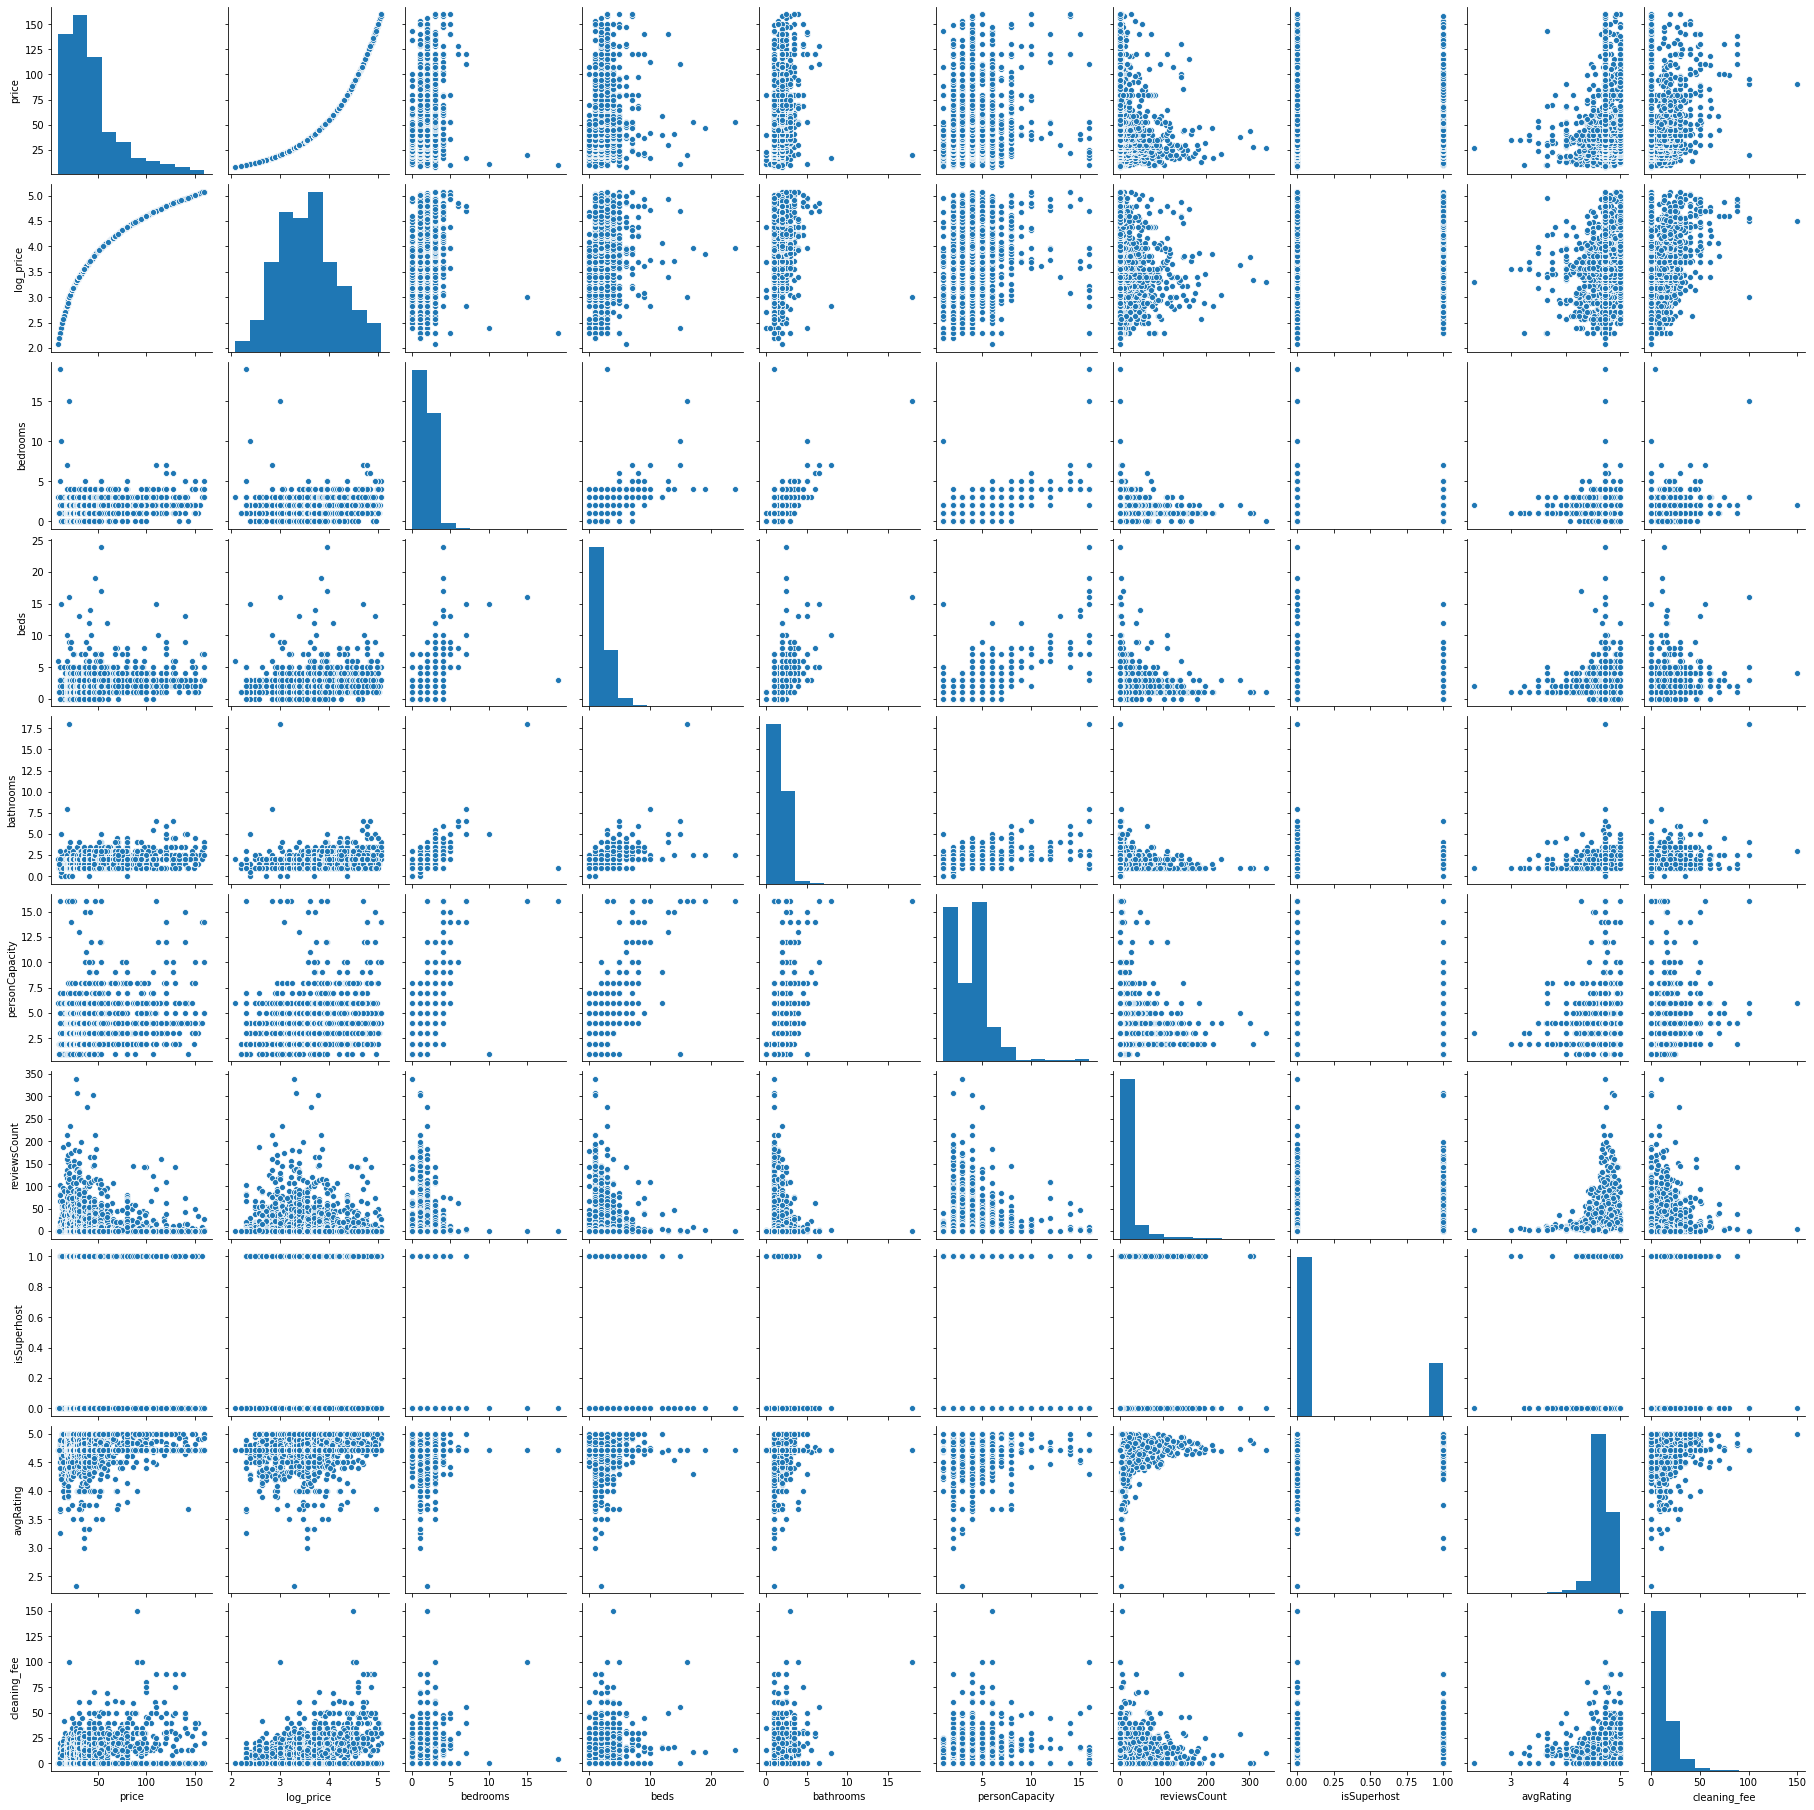

In [11]:
sns.pairplot(rooms[fields_to_compare])

In [13]:
log_rooms = rooms[fields_to_compare].copy()
features_to_log = ['bedrooms', 'beds', 'bathrooms', 'personCapacity']
for feature in features_to_log:
    log_rooms[feature] = np.log1p(log_rooms[feature])

In [14]:
log_rooms.corr()

,price,log_price,bedrooms,beds,bathrooms,personCapacity,reviewsCount,isSuperhost,avgRating,cleaning_fee
price,1.000000,0.937462,0.310533,0.267179,0.450905,0.304884,-0.088857,-0.061270,0.070585,0.212214
log_price,0.937462,1.000000,0.305958,0.266311,0.469571,0.310077,-0.084103,-0.046700,0.076367,0.213420
bedrooms,0.310533,0.305958,1.000000,0.653373,0.638018,0.662878,-0.075640,-0.069381,0.021303,0.159321
beds,0.267179,0.266311,0.653373,1.000000,0.518185,0.724034,-0.046568,-0.001262,0.045443,0.141045
bathrooms,0.450905,0.469571,0.638018,0.518185,1.000000,0.578267,-0.059933,-0.055573,0.044666,0.259729
personCapacity,0.304884,0.310077,0.662878,0.724034,0.578267,1.000000,0.006682,-0.040986,0.021755,0.211990
reviewsCount,-0.088857,-0.084103,-0.075640,-0.046568,-0.059933,0.006682,1.000000,0.272559,0.073529,0.119795
isSuperhost,-0.061270,-0.046700,-0.069381,-0.001262,-0.055573,-0.040986,0.272559,1.000000,0.285136,0.115742
avgRating,0.070585,0.076367,0.021303,0.045443,0.044666,0.021755,0.073529,0.285136,1.000000,0.063038
cleaning_fee,0.212214,0.213420,0.159321,0.141045,0.259729,0.211990,0.119795,0.115742,0.063038,1.000000
